# Lab 1
Student: **John Wu**

In [1]:
import sys, re, numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Read in files. The tokens.txt is read in as one blob of text. The sentences.txt is read in as a list where each element is each line in the file.

In [2]:
sentFile = './data/sentences.txt'
tokFile = './data/tokens.txt'

with open(tokFile) as f:
    tokBlob = f.read() # read entire blob

with open(sentFile) as f:
    sentLines = f.read().splitlines() # read entire blob

## (a) Tokenization

__Description of Processing__

Use regular expressions in an attempt to match patterns of tokens in the input file. The regex will match the following items (in order of priority):
* Various contractions ending in a period captured as one token (e.g. Dr., Mr., St.)
* Twitter-like hashtags beginning with pound sign and alphanumeric characters
* dollar amounts in the form of `$2.534` or `$5`
* E-mail addresses in the form of alphanumerics@alphanumerics.alphanumerics
* Acronym in the form of `A.B.C.D.E.` up to an arbitrary amount
* Consecutive alphanumeric characters (e.g. `[a-zA-Z0-9_]`)
* Alphanumeric characters surrounding period, comma, colon, apostrophe, slashes, and hyphen (e.g. `I'm`, `do-rag`, `will.i.am`, `AC/DC`, and `www.ab-inbev.com` each as as one token)
* Consecutive punctuations including the following: `[].,;:"'?()-_`, to match single and multi-character punctuations (e.g. ellipsis and em-dashes), as well as emoticons, such as `:(`.

At the end of the tokenization, all tokens are converted to lower case.

In [3]:
pat = r''' Dr\. | Mr\. | Mrs\. | Ms\. | St\. | Mt\. # matches various contractions
    | \#\w+                                         # matches hashtags like on Twitter
    | \$\d+(?:\.\d+)                                # matches dollar decimals
    | \w+\@\w+\.\w+                                 # matches e-mails
    | \w(?:\.\w)+\.                                 # matches acronyms
    | \w+(?:[/\.,’:\'—-]\w+)*%*                     # general match
    | [*[\]!<>=^{}|&.,;:?()_\"\'\-]+                # consecutive punctuations
    '''
tokenizer = re.compile(pat, flags=re.I|re.X)

def tokenize(txt):
    return [s.lower() for s in tokenizer.findall(txt)]

################################################################################
#tokenize.findall('adg 23:245 I\'m groot, U.S.A. 2*3 HIV+ #abc, 12.4% 4534=4534 A&W')

__Errors and Undesirable Results__

Initially, I separated the file with strings of whitespaces and also captured all punctuations separately. However, this lead to cases where words with punctuation within it (such as URL and hyphenated words) were split up as separate tokens. I added regex to capture for single punctuation being surrounded by alphanumeric strings as one token. The list of punctuation to be included in this scheme was discovered via trail and error. I initially started with just hypens and periods, but found special cases like colon (for timestamps like `12:45`), slashes, and apostrophes. Further complicating this is that sometimes single quotes are used as apostrophes, as em-dashes used for hyphens.

The next thing I noticed was that e-mails would be captured as two tokens before and after the at sign, so a case for e-mail was added. With this, I also added special cases for Twitter-like hashtags as well as dollar amounts to the case of $2.53. Lastly, I also noticed that several contractions like "Dr." would be tokenized as 'Dr' and '.', so I added a list of special cases for common contractions. Noticing that sometimes acronyms may have a period at the end, I also added a special case for them.

Unfortunately, despite all the work, many undesirable results still may remain. For example, for tokens using symbols like "HIV+" or other currencies like "¥400", the tokenizer will still fail. Moreover, there are many possible contractions that I had not taken care of, such as "Sgt.", "Fr.", or "Ct.". It also cannot distinguish between the last period of an acronym vs. an actual period.


__Demonstration of Results__

The first ten sentences (manually counted) are shown below:

In [4]:
print(repr(tokBlob[:345]))

"Russian for plastic bag is полиэтиленовый пакет. 7.3 out of 10 statistics is made up. I do not like green eggs and ham.I do\nnot like them Sam-I-Am. Dr. Mulholland lives on Mulholland Dr. in Hollywood. 1, 2, 3... slashdot.com has some interesting\narticles. I'm going to update my resumé. J.H.U. has a great la-crosse team. Born in the U.S. of A. "


The result of tokenization are presented below

In [5]:
print(tokenize(tokBlob[:345]))

['russian', 'for', 'plastic', 'bag', 'is', 'полиэтиленовый', 'пакет', '.', '7.3', 'out', 'of', '10', 'statistics', 'is', 'made', 'up', '.', 'i', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham.i', 'do', 'not', 'like', 'them', 'sam-i-am', '.', 'dr.', 'mulholland', 'lives', 'on', 'mulholland', 'dr.', 'in', 'hollywood', '.', '1', ',', '2', ',', '3', '...', 'slashdot.com', 'has', 'some', 'interesting', 'articles', '.', "i'm", 'going', 'to', 'update', 'my', 'resumé', '.', 'j.h.u.', 'has', 'a', 'great', 'la-crosse', 'team', '.', 'born', 'in', 'the', 'u.s.', 'of', 'a', '.']


## (b) Corpus Statistics

Processing tokens

In [6]:
vocabs = Counter(tokenize(tokBlob)) # counter is set with counts

__Basic Statistics__

In [7]:
print('Number of lines: %d'%tokBlob.count('\n'))
print('Vocabulary size: %d'%len(vocabs))
print('Collection size: %d'%sum(vocabs.values()))

Number of lines: 944802
Vocabulary size: 396931
Collection size: 22233607


__Most common types__

List of most common types at rank 1-100

In [8]:
tmp = vocabs.most_common(10000)
for n in range(50):
    print('%d: %s    \t%d: %s'%(n+1,tmp[n][0],n+51,tmp[n+50][0]))

1: the    	51: up
2: .    	52: when
3: ,    	53: her
4: to    	54: there
5: and    	55: can
6: of    	56: also
7: a    	57: out
8: in    	58: would
9: for    	59: people
10: is    	60: new
11: that    	61: if
12: on    	62: which
13: with    	63: so
14: was    	64: what
15: at    	65: time
16: it    	66: your
17: as    	67: after
18: be    	68: its
19: are    	69: my
20: i    	70: two
21: he    	71: )
22: said    	72: ?
23: this    	73: first
24: have    	74: some
25: from    	75: just
26: by    	76: do
27: will    	77: no
28: we    	78: year
29: "    	79: other
30: has    	80: years
31: you    	81: than
32: but    	82: like
33: not    	83: them
34: they    	84: over
35: an    	85: into
36: his    	86: get
37: :    	87: ,"
38: their    	88: now
39: or    	89: only
40: who    	90: last
41: more    	91: many
42: all    	92: school
43: one    	93: how
44: (    	94: us
45: about    	95: ."
46: were    	96: state
47: she    	97: because
48: had    	98: could
49: been    	99: most
50: our   

Most common at 500, 1000, 5000, and 10000

In [9]:
print('500: %s'%tmp[499][0])
print('1000: %s'%tmp[999][0])
print('5000: %s'%tmp[4999][0])
print('10000: %s'%tmp[9999][0])

500: makes
1000: trade
5000: valid
10000: .;


__Hapex legomena__


In [10]:
tmp = [s for s,c in vocabs.items() if c==1]
print('%d words or %.2f%% of vocab.'%(len(tmp),len(tmp)/len(vocabs)*100))

239422 words or 60.32% of vocab.


## (c) Zipf's Law

In [11]:
tmp = vocabs.most_common(len(vocabs))
plotY = np.log(np.array([c for s,c in tmp]))
plotX = np.log(np.arange(len(vocabs))+1)

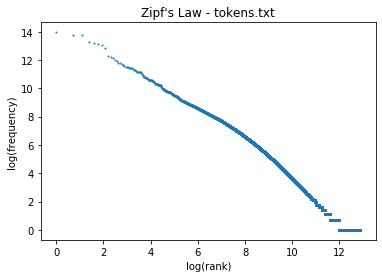

In [12]:
plt.scatter(plotX, plotY, s=1)
plt.title("Zipf's Law - tokens.txt")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

Based on visual examination, the corpus as tokenized by my tokenizer somewhat follows Zipf's Law, as the plot is generally inversely proportional between log of frequency and log of rank. However, the anonmalies at the very high and the very low ranks are apparent, and the fact that there seem to be an inflection point at the middle of the distribution. With these, it is unlikely that the data would pass something like a chi-square test for Zipf's distribution. It seems that this empirical distribution is piece-wise linear with a spline at around rank 1100 ($~e^7$) or so.

## (d) Sentence Boundary Detection

The sentence ending is detected via regular expression. The regular expression looks for the following pattern:
1. alphanumeric character or close quotation mark followed by any number of consecutive sentence terminator (`!?.`)
1. any number of white spaces followed by an optional close quotation
1. a capital letter preceded by an optional open quotation mark

If such pattern is found, it is deemed a sentence ending. Alternatively, the end of a line is also deemed as a sentence ending.

In [13]:
sentEnd = re.compile('([\w+\"\'”’][!?.]+[”\"]?)(\s+)([“\"]?[A-Z])|$')

In [14]:
def getSentenceEnds(txt):
    endings = []
    for m in sentEnd.finditer(txt):
        if m.end(2) == -1: # matches end of line
            endings.append(m.start(0)-1) # append end of line
        else: # matches period and start of new sentence
            endings.append(m.start(2)-1) # append start of 2nd token)
    return ' '.join(str(x) for x in [len(endings)] + endings)

with open('./jwu74.txt', 'w') as f:
    for s in sentLines:
        f.write(getSentenceEnds(s)+'\n')

To evaluate the effectiveness, I checked the results of my program on selected lines. It seems that the results are correct for  all the lines I reviewed. However, I know for a fact that it would produce false positives for abbreviations like Dr. and Mr., as they are followed by white space with a capital letter. I would estimate the accuracy to be in the high 90's.

## (e) NLTK

__Comparison of Tokenization__

In [15]:
import nltk
print(nltk.word_tokenize(tokBlob[:345]))

['Russian', 'for', 'plastic', 'bag', 'is', 'полиэтиленовый', 'пакет', '.', '7.3', 'out', 'of', '10', 'statistics', 'is', 'made', 'up', '.', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham.I', 'do', 'not', 'like', 'them', 'Sam-I-Am', '.', 'Dr.', 'Mulholland', 'lives', 'on', 'Mulholland', 'Dr.', 'in', 'Hollywood', '.', '1', ',', '2', ',', '3', '...', 'slashdot.com', 'has', 'some', 'interesting', 'articles', '.', 'I', "'m", 'going', 'to', 'update', 'my', 'resumé', '.', 'J.H.U', '.', 'has', 'a', 'great', 'la-crosse', 'team', '.', 'Born', 'in', 'the', 'U.S.', 'of', 'A', '.']


In [16]:
print(nltk.word_tokenize("I march to see Dr. March because my blood's B- #transfusion"))

['I', 'march', 'to', 'see', 'Dr.', 'March', 'because', 'my', 'blood', "'s", 'B-', '#', 'transfusion']


The tokenization of NLTK is largely similar to mine. The most singificant difference is that it does not fold the cases of the token, and it breaks up contractions (e.g. `I'm` -> `I` `'m` and `It's` -> `It` `'s`). Furthermore, it does not attempt to capture acronyms with periods at the end. NLTK also tokenizes consecutive punctuation marks into separate tokens, except for cases of period, where they are tokenized together. NLTK also captures common abbreviations and tokenize the period at the end of the abbreviation together with the word (e.g. `Dr.`). It also seem to tokenize more corner cases correctly, for example things like `B-`, `HIV+`, etc.

__Comparison of Sentence Segmentation__

In [17]:
print(nltk.sent_tokenize(sentLines[20]))
print(sentEnd.findall(sentLines[20]))

['There was a bigger discrepancy this year but nevertheless there was always a reduction in the results of the English students," Tremblay said.', 'GALLOWAY: You did these amazing films in the 70s, just extraordinary films, and what’s been great for me is getting to see them again.']
[('d.', ' ', 'G'), ('', '', '')]


In [18]:
print(nltk.sent_tokenize(sentLines[1920]))
print(sentEnd.findall(sentLines[1920]))

['"Anybody who thinks we\'re going to go to Pluto and find cold, dead rock is in for a rude awakening," said Bill McKinnon, a co-investigator for the New Horizons mission.', 'But the continued glut is starting to discourage that strategy.', "Community experts are involved in the process, too, making sure programs are lined up to meet the newcomers' needs."]
[('n.', ' ', 'B'), ('y.', ' ', 'C'), ('', '', '')]


In [19]:
s = "The best is Dr. Smith, who has 30 years of experience?! He is also very kind... Not to mention hard-working"
nltk.sent_tokenize(s)

['The best is Dr. Smith, who has 30 years of experience?!',
 'He is also very kind... Not to mention hard-working']

In [20]:
sentEnd.findall(s)

[('r.', ' ', 'S'), ('e?!', ' ', 'H'), ('d...', ' ', 'N'), ('', '', '')]

The sentence segmenter from NLTK seems to be producing largely the same result out of spot check of a few sentences. The only major difference is that NLTK catches more exceptions like "Dr." and does not tokenize ellipses as the end of a sentence.